<a href="https://colab.research.google.com/github/electrojam/banking-analysis-python-sql-powerbi/blob/main/banking_analysis_python_sql_powerbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading

In [4]:
# Load data from file Banking.csv
df = pd.read_csv('Banking.csv')
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,5/6/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,12/10/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,1/25/2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,3/28/2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,7/20/2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [5]:
print("Data Types:\n\n", df.dtypes)
missing_values = df.isnull().sum()
missing_values_percent = missing_values / len(df) * 100
print("\n\nMising Values:\n\n", missing_values)
print("\n\nMising Values Percentage:\n\n", missing_values_percent)
# Count unique values of all features
unique_values = df.nunique()
print("\n\nUnique Values:\n\n", unique_values)


df.describe()


Data Types:

 Client ID                    object
Name                         object
Age                           int64
Location ID                   int64
Joined Bank                  object
Banking Contact              object
Nationality                  object
Occupation                   object
Fee Structure                object
Loyalty Classification       object
Estimated Income            float64
Superannuation Savings      float64
Amount of Credit Cards        int64
Credit Card Balance         float64
Bank Loans                  float64
Bank Deposits               float64
Checking Accounts           float64
Saving Accounts             float64
Foreign Currency Account    float64
Business Lending            float64
Properties Owned              int64
Risk Weighting                int64
BRId                          int64
GenderId                      int64
IAId                          int64
dtype: object


Mising Values:

 Client ID                   0
Name                   

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


## 2. EDA Exploratory Data Analisys

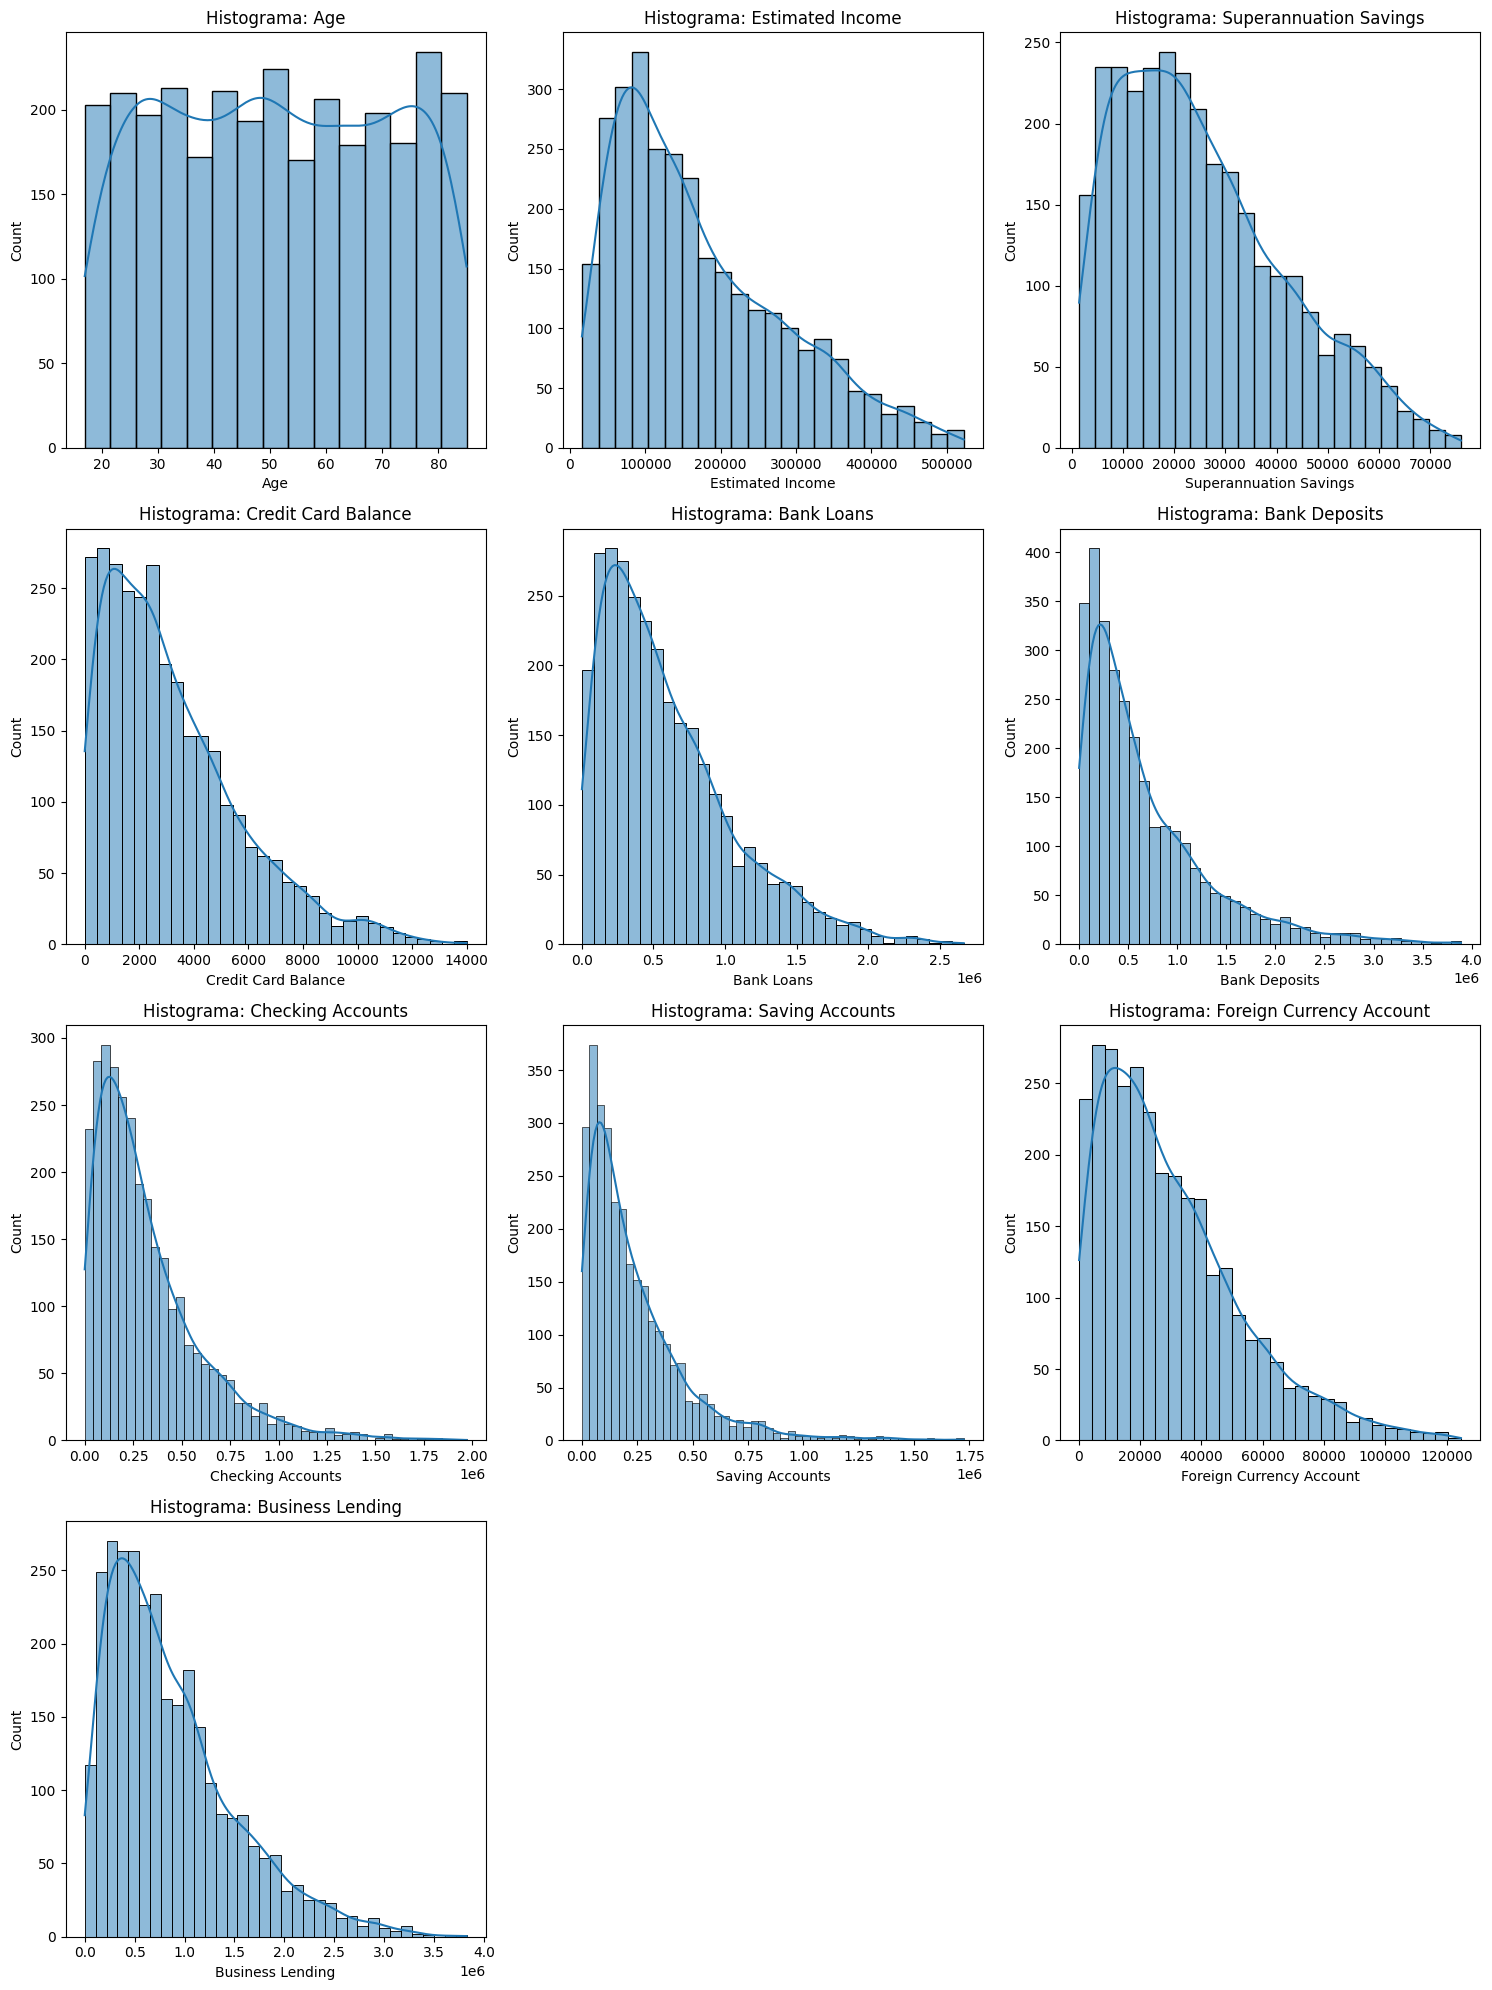

In [6]:
# Numerical features
numerical_features = [
    'Age',
    'Estimated Income',
    'Superannuation Savings',
    'Credit Card Balance',
    'Bank Loans',
    'Bank Deposits',
    'Checking Accounts',
    'Saving Accounts',
    'Foreign Currency Account',
    'Business Lending' ]

# Plot histogram of Numerical features
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate across numerical features
for i, column in enumerate(numerical_features):
  ax = axes[i]
  sns.histplot(df[column], kde=True, ax=ax)  # <-- Cambiado aquí
  ax.set_title(f'Histograma: {column}')

# Removemos subplots vacíos
for j in range(len(numerical_features), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Ingresos**


*   Ingresos Estimados (Estimated Income): Los ingresos estimados se concentran principalmente entre los 50.000  y  los 200.000.  Sin embargo se evidencian algunos clientes con ingresos muy altos.
*   Superannuation savings: La mayoría de los ahorros para jubilación han crecido entre los 50.000 y 250.000.  Lo que significaría una correlación directa con Ingresos estimados (Income estimated).

**Obligacones bancarias**
*   Credit card balance: La mayoría de clientes trata de mantener su tarjeta de crédito con un saldo por debajo de los 2.500


*   Bank loans: Se observa una considerable concentración de préstamos bancarios que ronda los 250.000

* Bank Deposits: A su vez los depositorios bancarios en su gran mayoría también rondan los 250.000








In [7]:
# Examinate the distribution of unique categories in categorical columns
categorical_cols = df[["BRId", "GenderId", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Amount of Credit Cards", "Properties Owned", "Risk Weighting"]]

for col in categorical_cols:
  print(f"\n Unique Values {col}:")
  print(df[col].value_counts())




 Unique Values BRId:
BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

 Unique Values GenderId:
GenderId
2    1512
1    1488
Name: count, dtype: int64

 Unique Values Nationality:
Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

 Unique Values Occupation:
Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

 Unique Values Fee Structure:
Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

 Unique Values Loyalty Classification:
Loyalty Classification
Jade        1331
Silver     

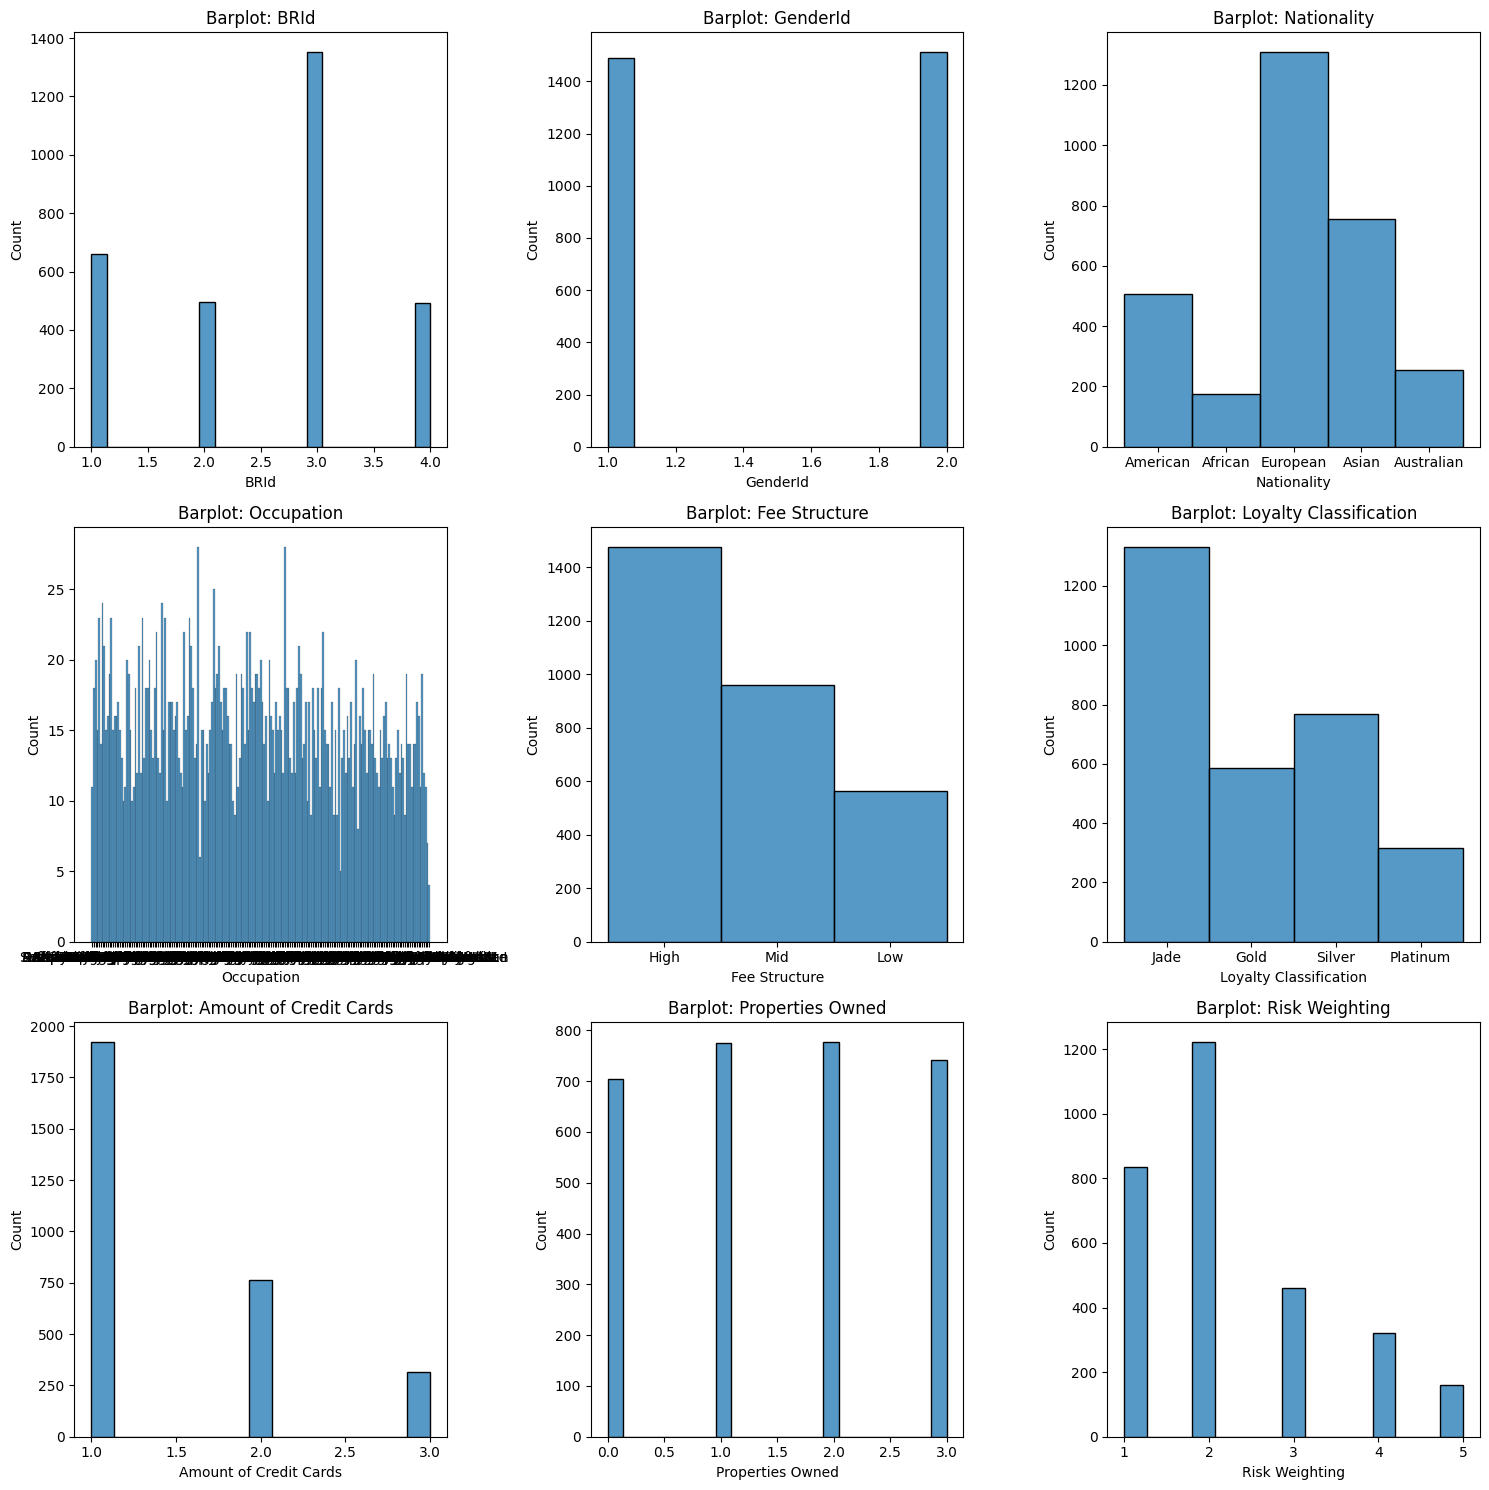

In [8]:
# Graph categorical columns with sns

# Plot histogram of categorical features
n_cols = 3
n_rows = (len(categorical_cols.columns) + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate across categorical features
for i, column in enumerate(categorical_cols.columns):
  ax = axes[i]
  sns.histplot(categorical_cols[column], ax=ax)
  ax.set_title(f'Barplot: {column}')

# Removemos subplots vacíos
for j in range(len(categorical_cols.columns), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Análisis de las variables categóricas

 **GenderId**: Los clientes en cuanto a género se encuentran balanceados en el data frame.

**Nationality**:  La gran mayoría de clientes son de Nacionalidad Europea, seguido por Asiática.  África aporta la menor cantidad de clientes.

**Loyalty Classification**:  La gran mayoría de clientes tiene está categorizado como "Jade" o "Gema".  Sin embargo, si se suman las dos categoría "Gold" y "Silver" también representan otra mayoría.

**Amount of Credit Cards**: Es evidente que los clientes prefieren manejar solo una tarjeta de crédito.

**Properties Owned**:  Al menos una propiedad poseen la gran mayoría de clientes registrados en el banco.

**Loyalty Classification**:  La mayoría de clientes tiene una ponderación de riesgo entre 1 y 2.